<a href="https://colab.research.google.com/github/slayerodd07/Stock-Predictor/blob/main/stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import datetime
import sys
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
end_date = datetime.date.today()

In [ ]:
# CHECKING THE DATE
def valid_date(dt_string):
    try:
        datetime.datetime.strptime(dt_string, "%Y-%m-%d")
        return True
    except:
        return False

In [ ]:
stock_name = input("Which Stock you want to visit?: ")
start_date = input("What should be the starting date? (YYYY-MM-DD): ")
while valid_date(start_date) == False:
    start_date = input("Please input the date again(YYYY-MM-DD) or type 0 to exit: ")
    if start_date == "0":
        print("Session ended")
        sys.exit()

Which Stock you want to visit?: AAPL
What should be the starting date? (YYYY-MM-DD): 2010-12-12


[*********************100%***********************]  1 of 1 completed


Data downloaded successfully
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2010-12-13    9.690851    9.792982    9.670667    9.772194  439815600
2010-12-14    9.649276    9.717061    9.610412    9.692658  351008000
2010-12-15    9.651387    9.730921    9.616139    9.640541  417312000
2010-12-16    9.678200    9.719172    9.643554    9.673379  322030800
2010-12-17    9.658919    9.694469    9.647471    9.689648  386929200
...                ...         ...         ...         ...        ...
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100
2025-01-17  229.979996  232.289993  228.479996  232.119995   68488300
2025-01-21  222.639999  224.419998  219.380005  224.000000   98070400
2025-01-22  223.830002  224.119995  219.789993  219.789993   

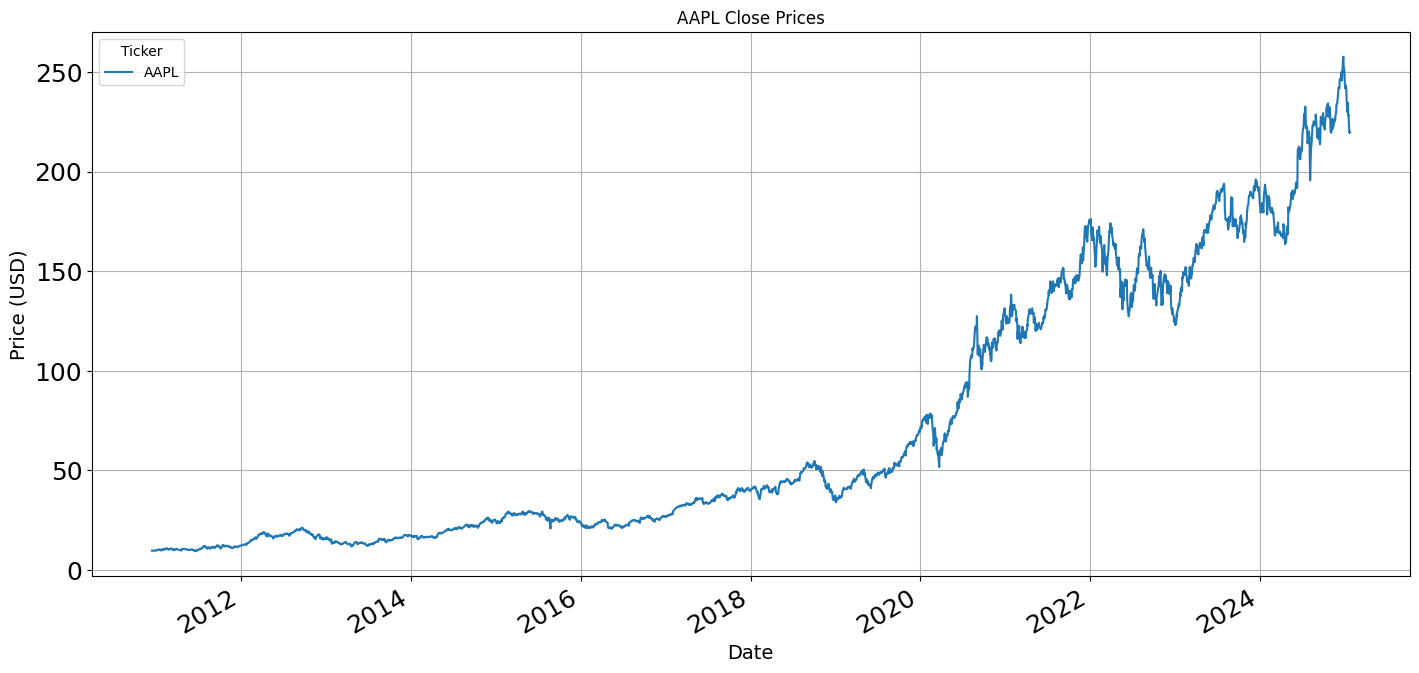

In [ ]:
data = yf.download(stock_name, start=start_date, end=end_date)
if data.empty:
  print("Stock Name is incorrect")
  sys.exit()
else:
  print("Data downloaded successfully")

print(data)
data['Low'].plot(figsize=(17, 8), fontsize=18, title=f'{stock_name} Close Prices')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.grid()
plt.show()

In [ ]:
data = yf.download(stock_name, start=start_date, end=end_date)
if data.empty:
    print("Stock name is incorrect")
    sys.exit()
else:
    print("Data downloaded successfully")
# data['Average Price'] = (data['High'] + data['Low']) / 2
# data['Average Price'].plot(figsize=(17, 8), fontsize=18, title=f'{stock_name} Average Daily Price (Open & Close)')
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Price (USD)", fontsize=14)
# plt.grid()
# plt.show()

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully


In [ ]:
# Add 30-day moving average
data['SMA_10'] = data['Close'].rolling(window=10).mean()

# Add 100-day moving average
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Add 200-day moving average
data['SMA_50'] = data['Close'].rolling(window=50).mean()


data['SMA_20'] = data['Close'].rolling(window=20).mean()



# Display the data with new features
# print(data[['Close', 'SMA_10', 'SMA_30', 'SMA_50']].tail())
# print(data)

In [ ]:
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data = data.dropna()

In [ ]:
data['Price Change'] = data['Close'].diff()
data['Gain'] = data['Price Change'].where(data['Price Change'] > 0, 0)
data['Loss'] = -data['Price Change'].where(data['Price Change'] < 0, 0)
data['Avg Gain'] = data['Gain'].rolling(window=7).mean()
data['Avg Loss'] = data['Loss'].rolling(window=7).mean()
data['RS'] = data['Avg Gain'] / data['Avg Loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))
print(data)

Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2011-02-23   10.322007   10.382862   10.201198   10.206020  671854400   
2011-02-24   10.329839   10.398227   10.193968   10.364184  499900800   
2011-02-25   10.488907   10.497041   10.387681   10.401539  380018800   
2011-02-28   10.641049   10.696482   10.578084   10.581700  403074000   
2011-03-01   10.523552   10.716664   10.474446   10.709133  456136800   
...                ...         ...         ...         ...        ...   
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000   
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100   
2025-01-17  229.979996  232.289993  228.479996  232.119995   68488300   
2025-01-21  222.639999  224.419998  219.380005  224.000000   98070400   
2025-01-22  223.830002  224.119995  219.789993  219

In [ ]:
data['STD_20'] = data['Close'].rolling(window=20).std()

data['Upper_B'] = data['SMA_20'] + data['STD_20']*2
data['Middle_B'] = data['SMA_20']
data['Lower_B'] = data['SMA_20'] - data['STD_20']*2


print(data)

Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2011-02-23   10.322007   10.382862   10.201198   10.206020  671854400   
2011-02-24   10.329839   10.398227   10.193968   10.364184  499900800   
2011-02-25   10.488907   10.497041   10.387681   10.401539  380018800   
2011-02-28   10.641049   10.696482   10.578084   10.581700  403074000   
2011-03-01   10.523552   10.716664   10.474446   10.709133  456136800   
...                ...         ...         ...         ...        ...   
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000   
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100   
2025-01-17  229.979996  232.289993  228.479996  232.119995   68488300   
2025-01-21  222.639999  224.419998  219.380005  224.000000   98070400   
2025-01-22  223.830002  224.119995  219.789993  219